In [141]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

df= pd.read_csv(r'C:\Users\kckyl\OneDrive\Desktop\Data Cleaning Project\movies.csv')

In [142]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [143]:
#Check if there are missing values in columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [144]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [145]:
# There are non-numeric or missing values that can not be filled in as integers, so we use the 'fillna()' method.

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [146]:
#Actually let's delete all the invalid values

df = df.drop(df[(df['budget'] == 0) & (df['gross'] == 0)].index)

In [147]:
#The 'Released' column years do not match with the 'Year' column. The 'Released' column also has the country in it. Let's fix this

#Remove country from Released column
df['released'] = df['released'].astype(str).str.replace(r'\s*\([^)]*\)\s*', '')


C:\Users\kckyl\AppData\Local\Temp\ipykernel_10996\3992862105.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['released'] = df['released'].astype(str).str.replace(r'\s*\([^)]*\)\s*', '')


In [148]:
#Correct year

df['adjustedyear'] = df['released'].astype(str).str[-4:]

#Check
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,adjustedyear
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [149]:
#Sort by gross revenue

df = df.sort_values(by='gross', inplace=False, ascending=False)

In [150]:
#See entire dataset on pandas

pd.set_option('display.max_rows', None)

In [151]:
#Drop any duplicates, .head() for github purposes or it lists the entire list.

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

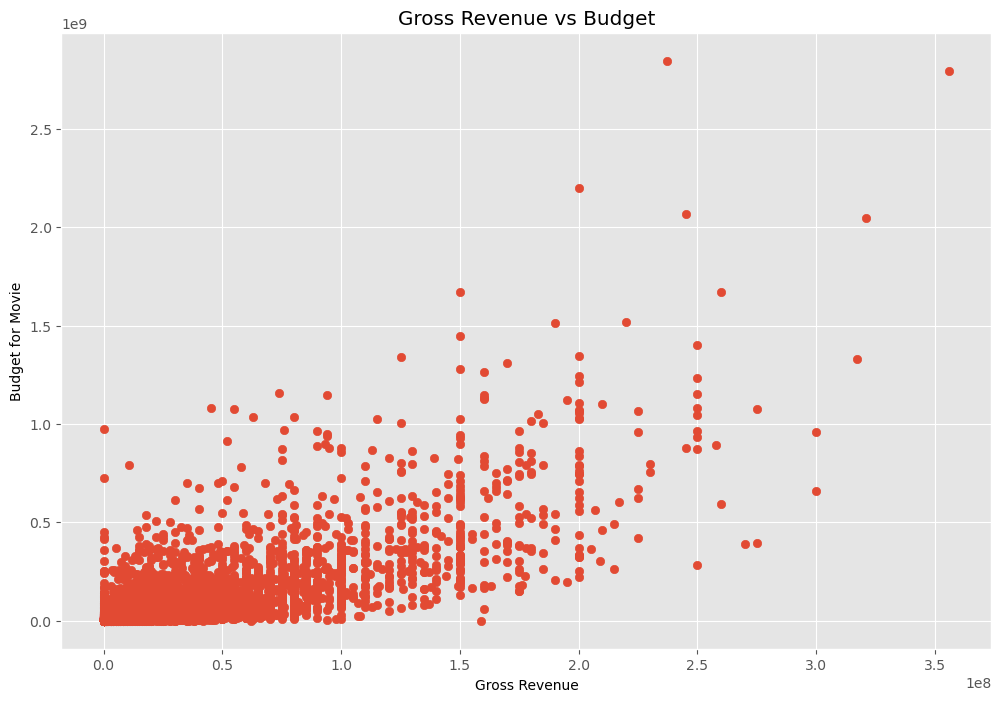

In [152]:
# Scatter plot with budget vs gross.
plt.scatter(x=df['budget'], y=df['gross'])
plt.title ('Gross Revenue vs Budget')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for Movie')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

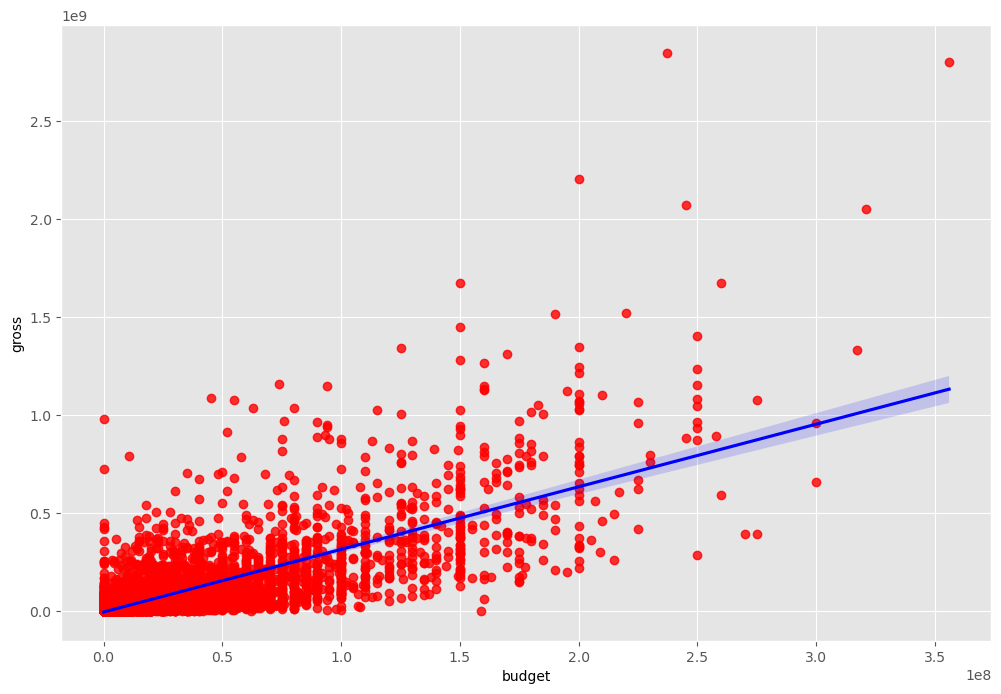

In [153]:
# Plot Budget vs Gross w/ Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [154]:
#Check correlation

df.corr()

C:\Users\kckyl\AppData\Local\Temp\ipykernel_10996\14272428.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.094934,0.217498,0.303384,0.258046,0.116286
score,0.094934,1.000000,0.412226,0.054079,0.186987,0.398977
votes,0.217498,0.412226,1.000000,0.484067,0.631410,0.309768
budget,0.303384,0.054079,0.484067,1.000000,0.749085,0.269300
gross,0.258046,0.186987,0.631410,0.749085,1.000000,0.245416
runtime,0.116286,0.398977,0.309768,0.269300,0.245416,1.000000


C:\Users\kckyl\AppData\Local\Temp\ipykernel_10996\732009711.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


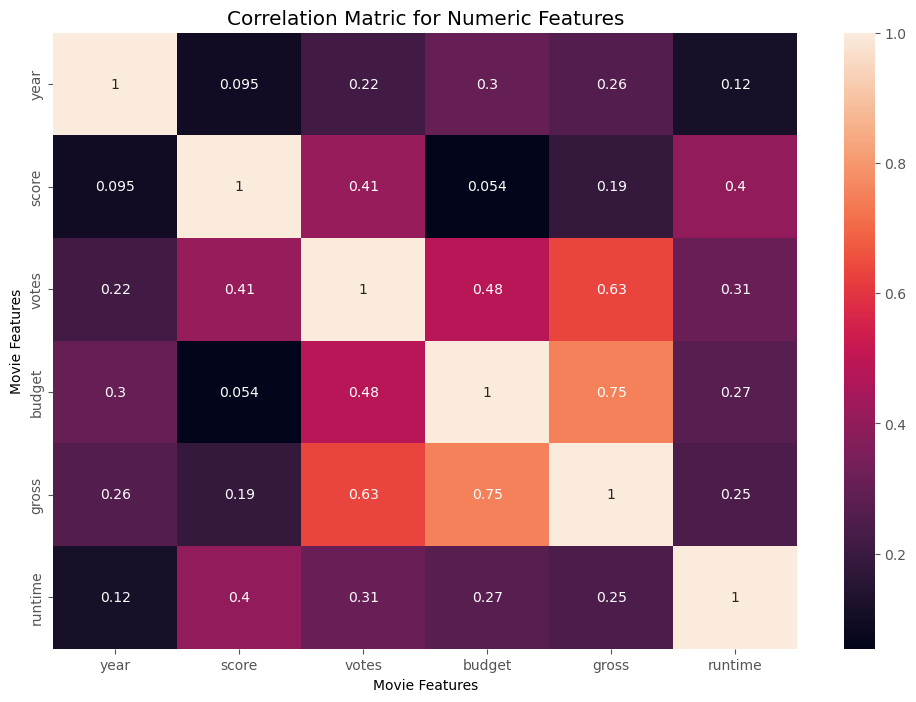

In [155]:
#Heat Map for Correlation

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [156]:
#Categorizing all non-numeric values to a numeric value

df_numeric = df

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes
        
df_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,adjustedyear
5445,524,5,0,2009,603,7.8,1100000.0,1123,1737,2263,55,237000000,2847246203,2187,162.0,29
7445,526,5,0,2019,150,8.4,903000.0,161,725,2170,55,356000000,2797501328,1556,181.0,39
3045,6784,5,6,1997,609,7.8,1100000.0,1123,1737,1542,55,200000000,2201647264,2187,194.0,17
6663,5052,5,0,2015,605,7.8,876000.0,1093,2498,512,55,245000000,2069521700,1494,138.0,35
7244,527,5,0,2018,158,8.4,897000.0,161,725,2170,55,321000000,2048359754,1556,149.0,38


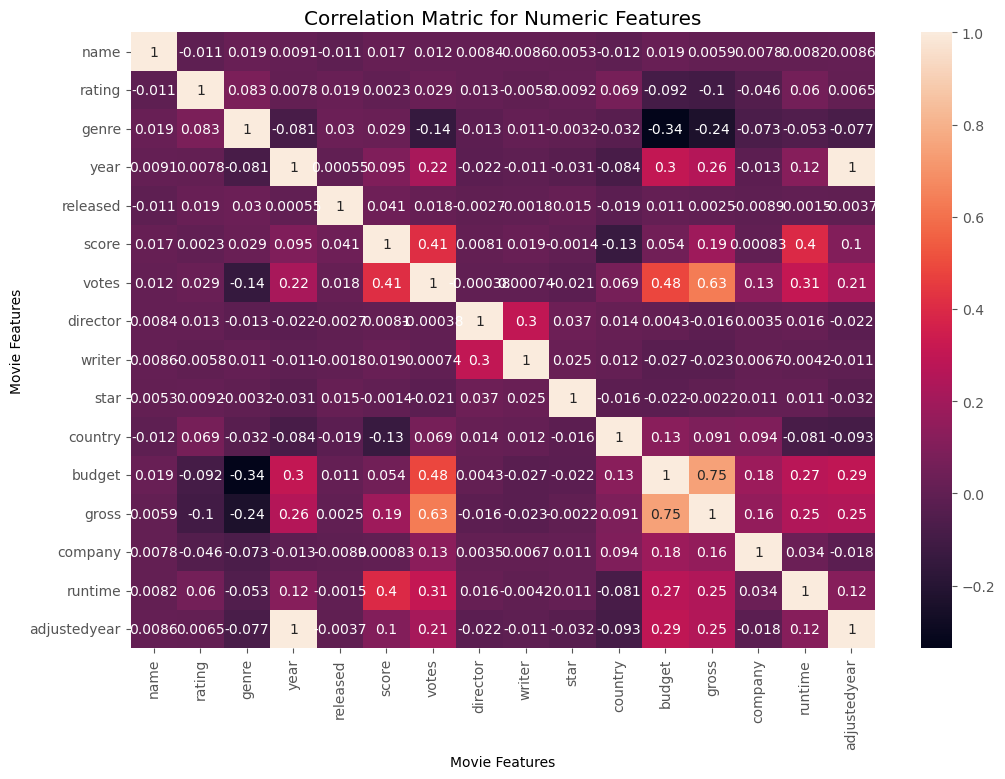

In [157]:
#Correlation Heat Map for all new updated numeric values

correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [158]:
df_numeric.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,adjustedyear
name,1.000000,-0.010616,0.019192,0.009101,-0.011086,0.016589,0.011697,0.008374,0.008619,0.005349,-0.011642,0.019084,0.005873,0.007767,0.008227,0.008632
rating,-0.010616,1.000000,0.083396,0.007751,0.019040,0.002268,0.029020,0.012715,-0.005756,0.009247,0.068685,-0.091854,-0.103696,-0.046192,0.060365,0.006547
genre,0.019192,0.083396,1.000000,-0.080541,0.029745,0.029152,-0.144875,-0.012898,0.011029,-0.003206,-0.031818,-0.336177,-0.235355,-0.072818,-0.052782,-0.076521
year,0.009101,0.007751,-0.080541,1.000000,0.000550,0.094934,0.217498,-0.022053,-0.010579,-0.031493,-0.083556,0.303384,0.258046,-0.013149,0.116286,0.997528
released,-0.011086,0.019040,0.029745,0.000550,1.000000,0.041393,0.017908,-0.002704,-0.001774,0.015283,-0.018889,0.011383,0.002512,-0.008928,-0.001494,-0.003692
score,0.016589,0.002268,0.029152,0.094934,0.041393,1.000000,0.412226,0.008083,0.019008,-0.001410,-0.133649,0.054079,0.186987,0.000830,0.398977,0.102603
votes,0.011697,0.029020,-0.144875,0.217498,0.017908,0.412226,1.000000,-0.000375,0.000744,-0.020894,0.069325,0.484067,0.631410,0.131971,0.309768,0.213189
director,0.008374,0.012715,-0.012898,-0.022053,-0.002704,0.008083,-0.000375,1.000000,0.297461,0.036808,0.014078,0.004281,-0.015635,0.003543,0.016126,-0.021824
writer,0.008619,-0.005756,0.011029,-0.010579,-0.001774,0.019008,0.000744,0.297461,1.000000,0.025246,0.011923,-0.026503,-0.023461,0.006659,-0.004159,-0.010730
star,0.005349,0.009247,-0.003206,-0.031493,0.015283,-0.001410,-0.020894,0.036808,0.025246,1.000000,-0.015740,-0.021729,-0.002153,0.010705,0.010532,-0.032186


In [159]:
correlation_mat = df_numeric.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.010616
              genre           0.019192
              year            0.009101
              released       -0.011086
              score           0.016589
              votes           0.011697
              director        0.008374
              writer          0.008619
              star            0.005349
              country        -0.011642
              budget          0.019084
              gross           0.005873
              company         0.007767
              runtime         0.008227
              adjustedyear    0.008632
rating        name           -0.010616
              rating          1.000000
              genre           0.083396
              year            0.007751
              released        0.019040
              score           0.002268
              votes           0.029020
              director        0.012715
              writer         -0.005756
              star       

In [160]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.336177
budget        genre          -0.336177
gross         genre          -0.235355
genre         gross          -0.235355
              votes          -0.144875
votes         genre          -0.144875
score         country        -0.133649
country       score          -0.133649
gross         rating         -0.103696
rating        gross          -0.103696
adjustedyear  country        -0.093301
country       adjustedyear   -0.093301
rating        budget         -0.091854
budget        rating         -0.091854
country       year           -0.083556
year          country        -0.083556
runtime       country        -0.081079
country       runtime        -0.081079
genre         year           -0.080541
year          genre          -0.080541
genre         adjustedyear   -0.076521
adjustedyear  genre          -0.076521
company       genre          -0.072818
genre         company        -0.072818
              runtime        -0.052782
runtime       genre      

In [161]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.631410
votes         gross           0.631410
gross         budget          0.749085
budget        gross           0.749085
year          adjustedyear    0.997528
adjustedyear  year            0.997528
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
adjustedyear  adjustedyear    1.000000
dtype: float64

In [162]:
#High correlation with budget and gross & votes and gross.